O	 filtro	 de	 média	 pode	 ser	 aplicado	 pela	 função	 	blur		 da
biblioteca	 OpenCV,	 que	 requer	 apenas	 dois	 parâmetros.	 O
primeiro	 refere-se	 à	 imagem	 que	 será	 submetida	 ao	 filtro,	 o
segundo,	 à	 dimensão	 da	 máscara	 que	 será	 aplicada.	 O	 código
seguinte	exemplifica	como	realizar	a	aplicação	do	filtro	de	média:

In [1]:
import cv2 
import matplotlib.pyplot as plt

imgOriginal = cv2.imread("lena_ruido3.jpg") 
imgTratada = cv2.blur(imgOriginal, (5,5)) 

plt.imshow(imgOriginal)
plt.show()
plt.imshow(imgTratada)

<Figure size 640x480 with 1 Axes>

Para utilizar o filtro gaussiano três	 parâmetros	 são	necessários	 para	 execução.
O	primeiro	deles	é	a	imagem	a	ser	tratada;	o	segundo,	a	dimensão
da	matriz	que	representa	a	máscara	de	filtragem;	e	o	último,	o	grau
de	 suavização.	Na	prática,	quanto	maior	o	valor	desse	último parâmetro,	mais
intensa	 será	 a	 suavização.	

É recomendado que a máscara seja uma matriz quadrada, com número ímpar de linhas e colunas. Quanto maior a dimensão da máscara, maior será o efeito do filtro sobre a imagem. O código seguinte exemplifica a aplicação do filtro gaussiano com o método GaussianBlur .

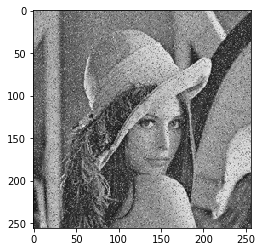

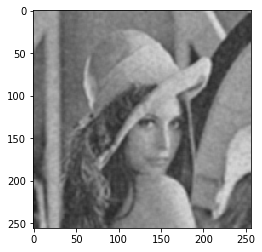

In [2]:
import cv2 
imgOriginal = cv2.imread("lena_ruido3.jpg") 
imgTratada = cv2.GaussianBlur(imgOriginal,(5,5),2)

plt.imshow(imgOriginal)
plt.show()
plt.imshow(imgTratada)

Para utilizar o filtro da mediana, apenas dois parâmetros são necessários para utilizá-lo. O primeiro deles é a imagem que receberá o tratamento, e o segundo é um valor inteiro, ímpar e positivo, que indicará o tamanho da máscara.

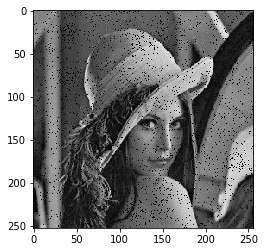

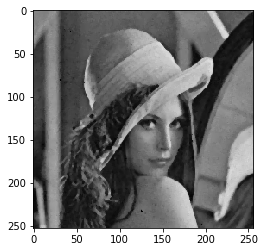

In [3]:
import cv2 
imgOriginal = cv2.imread("lena_ruido2.jpg") 
imgTratada = cv2.medianBlur(imgOriginal,3)

plt.imshow(imgOriginal)
plt.show()
plt.imshow(imgTratada)

De todos os filtros apresentados até então, o filtro bilateral é o mais indicado quando o objetivo é suavizar a imagem preservando os detalhes de bordas e contornos.

O	 filtro	 bilateral	 pode	 ser	 aplicado	 pelo	 método
	bilateralFilter		 da	 biblioteca	 OpenCV.	 Para	 executar	 esse
método,	 quatro	 parâmetros	 são	 requeridos.	 O	 primeiro	 deles	 é	 a
imagem	que	receberá	o	tratamento,	e	o	segundo	indica	o	tamanho
do	filtro.	Quanto	maior	o	valor	do	segundo	parâmetro,	mais	lenta
será	a	 execução	 desse	método,	não	 sendo	 recomendado	 trabalhar
com	 valores	 superiores	 a	 5	 em	 processamento	 de	 imagens	 em
tempo	real.

Geralmente,	os	mesmos	valores	são	utilizados	no	terceiro	e	no
quarto	 parâmetro.	 O	 terceiro	 é	 conhecido	 como	 σ	 Color	 (sigma
color),	e	o	quarto	como	σ	Space	(sigma	space).	Na	prática,	quando
menores	 que	 10,	 esses	 valores	 não	 apresentam	 resultados
significativos	no	tratamento	de	ruído	e	suavização. Entretanto,	 quando	 maiores	 que	 150,	 podem	 provocar	 um
tratamento	 muito	 intenso,	 fazendo	 com	 que	 a	 imagem	 perca
detalhes	importantes.	 Quanto	maior	 o	 valor	 do	 parâmetro	 sigma
color,	maior	 será	 a	mistura	 das	 cores	 vizinhas,	 e	 quanto	maior	 o
valor	do	 parâmetro	 sigma	 space,	maior	 será	a	influência	 do	filtro
nos	pixels	vizinhos	–	desde	que	suas	cores	sejam	próximas.


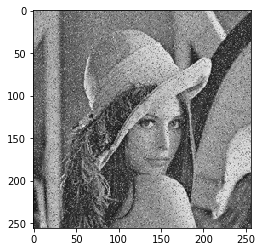

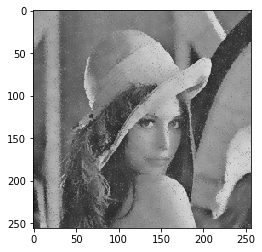

In [4]:
import cv2 
imgOriginal = cv2.imread("lena_ruido3.jpg") 
imgTratada = cv2.bilateralFilter(imgOriginal, 11, 90, 90)

plt.imshow(imgOriginal)
plt.show()
plt.imshow(imgTratada)

Aula passada nós também vimos a operação CONVOLUÇÃO.

![alt text](convolucao.jpg "Exemplo de convolução")

Na figura acima, a primeira matriz, da esquerda para a direita, representa uma imagem de entrada em tons de cinza. A segunda matriz representa a máscara (kernel), ou seja, o filtro que será aplicado à imagem de entrada. A terceira apresenta o resultado da convolução, no qual o pixel-alvo, posicionado na linha 3 e coluna 3, teve o seu valor alterado de 11 para 2

A função filter2D do OpenCV realiza a convolução de uma imagem com um kernel

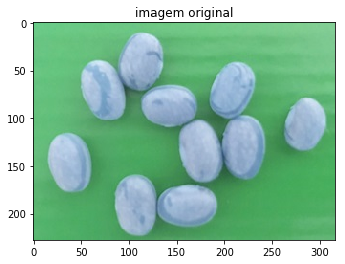

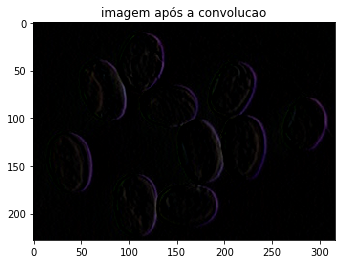

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('feijao.jpg')

kernel = np.array([[0, 0, 0],[1, 0, -1],[0, 0, 0]])
img2 = cv2.filter2D(img, -1, kernel)

plt.title('imagem original')
plt.imshow(img)
plt.show()
plt.title('imagem após a convolucao')
plt.imshow(img2)


Retornando ao problema de segmentar os feijões do fundo

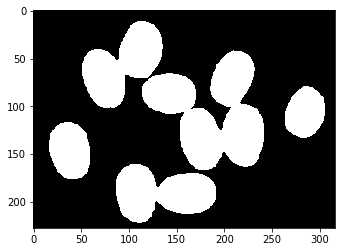

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('feijao.jpg')

qtdeLinhas, qtdeColunas, c = img.shape

B = img[:,:,0]
G = img[:,:,1]
R = img[:,:,2]

W = np.zeros((qtdeLinhas, qtdeColunas), dtype=int)+255 #criando uma imagem toda branca (todos os pixels com valores = 255)


for i in range(qtdeLinhas):
    for j in range(qtdeColunas):
        if(G[i,j] > R[i,j] and G[i,j] > B[i,j]): #se um pixel tiver o canal verde  maior que os outros dois canais (Red e Blue)
            W[i,j] = 0 # o pixel vira fundo
        
plt.gray()
plt.imshow(W)


Na imagem acima temos uma imagem binária, em que o objeto é representado pela cor branca (255) e o fundo pela cor preta (0)

Para salvar a imagem acima em um novo arquivo, escrevemos o seguinte comando

In [7]:
cv2.imwrite('img_binaria.png', W)

True

A seguir, vamos ver um novo conceito chamado de operações morfológicas

Operações	 morfológicas	 são	 operações	 que	 modificam	 o	 formato
ou	 a	 estrutura	 dos	 objetos	 representados	 em	 uma	imagem.	 Essas
operações	 podem	 ser	 aplicadas	 a	 qualquer	 tipo	 de	 imagem,
entretanto,	 são	 frequentemente	 utilizadas	 em	 imagens	 binárias,
com	a	finalidade	de	realçar	o	objeto	de	interesse,	ou	 tratar	ruídos
provocados	pelo	processo	de	binarização.

Elemento Estruturante: pode ser visto como uma imagem binária, menor que a imagem original, armazenado geralmente em uma matriz quadrada. Ele é a base para que qualquer operação morfológica seja executada

In [8]:
import cv2

E1 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
E2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
E3 = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

print("Elemento estruturante: Retângulo 5x5 \n", E1)
print("\n Elemento estruturante: Elipse 5x5 \n", E2)
print("\n Elemento estruturante: Cruz 5x5 \n", E3)

Elemento estruturante: Retângulo 5x5 
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]

 Elemento estruturante: Elipse 5x5 
 [[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]

 Elemento estruturante: Cruz 5x5 
 [[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


Em muitos casos, quando o objetivo é realçar objetos de interesse com formato predominantemente circular, o elemento estruturante elíptico apresenta melhores resultados. Por outro lado, quando o objeto de interesse apresenta formato retangular, ou composto por mais retas que curvas, o elemento estruturante retangular é o mais indicado.

Em casos especiais, quando nenhum dos elementos estruturantes predefinidos apresentam bons resultados, podemos criar um elemento estruturante personalizado. O código a seguir exemplifica esse procedimento. Observe que basta defini-lo em uma matriz binária.

In [9]:
import cv2 
import numpy as np 
elementoEstruturante = np.matrix([ 
                                    [0, 0, 1, 1, 1], 
                                    [0, 0, 1, 1, 1], 
                                    [1, 1, 1, 1, 1], 
                                    [1, 1, 1, 0, 0], 
                                    [1, 1, 1, 0, 0] ], np.uint8)

print("Elemento estruturante criado: \n", elementoEstruturante)

Elemento estruturante criado: 
 [[0 0 1 1 1]
 [0 0 1 1 1]
 [1 1 1 1 1]
 [1 1 1 0 0]
 [1 1 1 0 0]]


O	algoritmo	da	operação	de	erosão	consiste	em	sobrepor	cada
pixel	 da	 imagem	 de	 entrada	 com	 o	 centro	 do	 elemento
estruturante.	 Se	 todos	 os	 pontos	 do	 elemento	 estruturante
coincidirem	 com	 os	 pontos	 do	 objeto	 de	 interesse,	 então,	 esse
ponto	torna-se	parte	do	objeto	na	imagem	de	saída.	É	importante
ressaltar	que,	neste	procedimento,	a	imagem	de	saída	é	inicializada
apenas	 com	 o	 fundo,	 ou	 seja,	 sem	 nenhum	 objeto	 inicialmente
representado.

![alt text](erosao.jpg "Exemplo de erosao")

A operação de erosão pode ser aplicada a uma imagem com a função erode , da biblioteca OpenCV. Esta requer três parâmetros fundamentais: a imagem a ser tratada, o elemento estruturante e o número de iterações desejadas.

elemento estruturante utilizado: 
  [[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


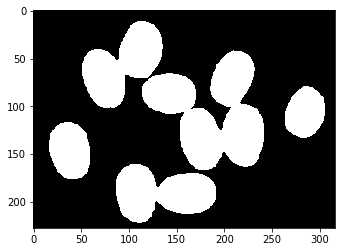

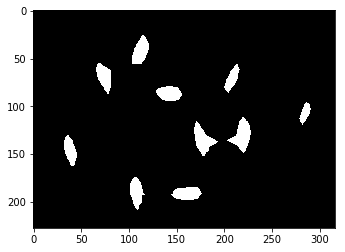

In [25]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

imagemOriginal = cv2.imread("img_binaria.png", 0) 

elementoEstruturante = cv2.getStructuringElement( cv2.MORPH_ELLIPSE, (5,5) ) 

print("elemento estruturante utilizado: \n ", elementoEstruturante)

imagemProcessada = cv2.erode( imagemOriginal, elementoEstruturante, iterations = 7 ) 


plt.gray()
plt.imshow(imagemOriginal)
plt.show()
plt.imshow(imagemProcessada)

In [28]:
# Contando os feijões
qntLinhas, qntColunas = imagemProcessada.shape
labels = np.full((qntLinhas, qntColunas), 0, dtype=int) #Cria matriz de labels preenchida com zeros
numero_feijao = 0

for i in range(1, qntLinhas-1):
    for j in range(1, qntColunas-1):
        if imagemProcessada[i,j] > 0:
            cima = labels[i-1,j]
            baixo = labels[i+1,j]
            esquerda = labels[i,j-1]
            direita = labels[i,j+1]
            
            supEsquerda = labels[i-1,j-1]
            supDireita = labels[i-1,j+1]
            infEsquerda = labels[i+1,j-1]
            infDireita = labels[i+1,j+1]
            
            if cima != 0:
                labels[i,j] = cima
            elif baixo != 0:
                labels[i,j] = baixo
            elif esquerda != 0:
                labels[i,j] = esquerda
            elif direita != 0:
                labels[i,j] = direita
            elif supEsquerda != 0:
                labels[i,j] = supEsquerda
            elif supDireita != 0:
                labels[i,j] = supDireita
            elif infEsquerda != 0:
                labels[i,j] = infEsquerda
            elif infDireita != 0:
                labels[i,j] = infDireita
            # Se nenhum pixel a sua volta tiver label, uma nova é criada
            else:
                numero_feijao = numero_feijao + 1
                labels[i,j] = numero_feijao

        else:
            continue

print(numero_feijao)

19


## Erosão em imagem feita com bit de fundo

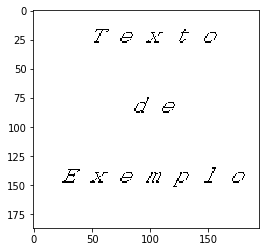

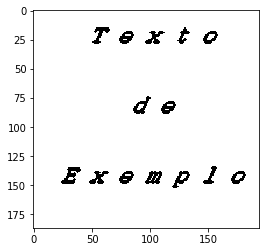

In [11]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

imagemOriginal = cv2.imread("texto_exemplo.png", 0) 

elementoEstruturante = cv2.getStructuringElement( cv2.MORPH_ELLIPSE, (3,3) ) 

imagemProcessada = cv2.erode( imagemOriginal, elementoEstruturante, iterations = 1 ) 

plt.gray()
plt.imshow(imagemOriginal)
plt.show()
plt.imshow(imagemProcessada)

O algoritmo da operação de dilatação, assim como o de erosão, consiste em sobrepor cada pixel da imagem de entrada com o centro do elemento estruturante. Se todos os pontos do elemento estruturante coincidirem com os pontos do objeto de interesse, então, esse ponto torna-se parte do objeto na imagem de saída. Diferente da operação de erosão, nesta, a imagem de saída é inicializada como uma cópia da imagem de entrada.

![alt text](dilatacao.jpg "Exemplo de dilatacao")

A	 função	 	 dilate	 ,	 da	 biblioteca	 OpenCV,	 possibilita	 a
execução	 dessa	 operação.	 Ela	 requer	 os	 mesmos	 parâmetros
apresentados	na	função		erode	.	 O	 código	 a	 seguir	 exemplifica	 a
operação:

elemento estruturante utilizado: 
  [[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


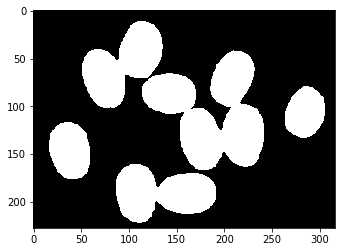

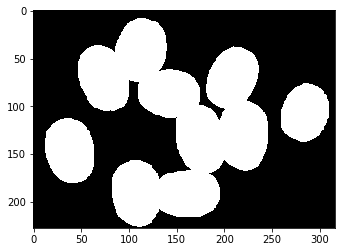

In [12]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

imagemOriginal = cv2.imread("img_binaria.png", 0) 
elementoEstruturante = cv2.getStructuringElement( cv2.MORPH_ELLIPSE, (5,5) ) 

print("elemento estruturante utilizado: \n ", elementoEstruturante)

imagemProcessada = cv2.dilate(imagemOriginal, elementoEstruturante, iterations = 2 )


plt.gray()
plt.imshow(imagemOriginal)
plt.show()
plt.imshow(imagemProcessada)

Elemento estruturante utilizado 
 [[1 1 1 1 1]]


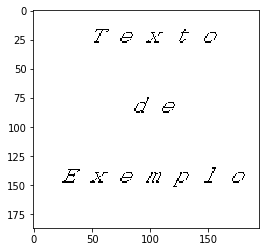

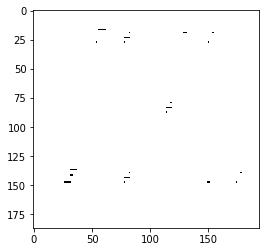

In [13]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

imagemOriginal = cv2.imread("texto_exemplo.png", 0) 
elementoEstruturante = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,1))

print("Elemento estruturante utilizado \n", elementoEstruturante)

imagemProcessada = cv2.dilate(imagemOriginal, elementoEstruturante, iterations = 1 )


plt.gray()
plt.imshow(imagemOriginal)
plt.show()
plt.imshow(imagemProcessada)

Essas duas operações (erosão e dilatação) são as operações básicas. Quando elas são combinadas, formam outras operações que veremos a seguir.

A	operação	de	abertura	é	caracterizada	pela	operação	de	erosão
seguida	 da	 operação	 de	 dilatação

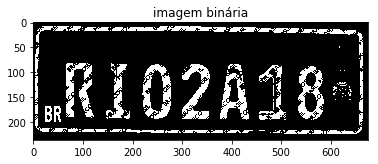

In [14]:
# primeiro, vamos segmentar os numeros da imagem da placa de um veículo
# o código abaixo realiza esse procedimento

import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('placa.png')

qtdeLinhas, qtdeColunas, c = img.shape

B = img[:,:,0]
G = img[:,:,1]
R = img[:,:,2]

W = np.zeros((qtdeLinhas, qtdeColunas), dtype=int) 


for i in range(qtdeLinhas):
    for j in range(qtdeColunas):
        if(R[i,j] < 60 and G[i,j] < 60 and B[i,j] < 60): 
            W[i,j] = 255 
        
plt.gray()
plt.title('imagem binária')
plt.imshow(W)

elemento estruturante utilizado: 
  [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


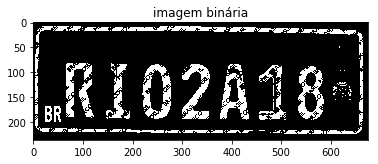

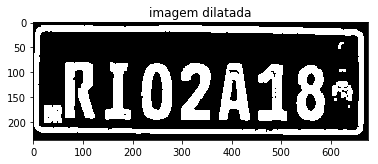

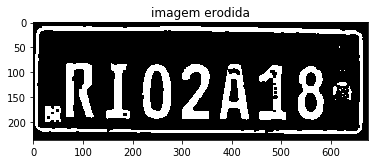

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('placa.png')

qtdeLinhas, qtdeColunas, c = img.shape

B = img[:,:,0]
G = img[:,:,1]
R = img[:,:,2]

imagemBinaria = np.zeros((qtdeLinhas, qtdeColunas)) 


for i in range(qtdeLinhas):
    for j in range(qtdeColunas):
        if(R[i,j] < 60 and G[i,j] < 60 and B[i,j] < 60): 
            imagemBinaria[i,j] = 255 
        
plt.gray()
plt.title('imagem binária')
plt.imshow(imagemBinaria)


#vamos efetuar uma dilatacao na imagem binária

elementoEstruturante = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

print("elemento estruturante utilizado: \n ", elementoEstruturante)

imagemDilatada = cv2.dilate(imagemBinaria, elementoEstruturante, iterations = 1)


plt.show()
plt.title('imagem dilatada')
plt.imshow(imagemDilatada)


#vamos agora efetuar uma erosao na imagem dilatada
imagemProcessada = cv2.erode(imagemDilatada, elementoEstruturante, iterations = 1 )

plt.show()
plt.title('imagem erodida')
plt.imshow(imagemProcessada)


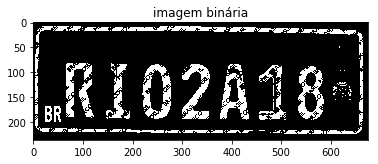

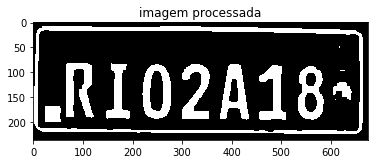

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('placa.png')

qtdeLinhas, qtdeColunas, c = img.shape

B = img[:,:,0]
G = img[:,:,1]
R = img[:,:,2]

imagemBinaria = np.zeros((qtdeLinhas, qtdeColunas)) 


for i in range(qtdeLinhas):
    for j in range(qtdeColunas):
        if(R[i,j] < 60 and G[i,j] < 60 and B[i,j] < 60): 
            imagemBinaria[i,j] = 255 
        
plt.gray()
plt.title('imagem binária')
plt.imshow(imagemBinaria)


#vamos efetuar uma operação fechamento

elementoEstruturante = cv2.getStructuringElement(cv2.MORPH_RECT,(9,9))
imagemProcessada = cv2.morphologyEx(imagemBinaria, cv2.MORPH_CLOSE, elementoEstruturante)

plt.show()
plt.title('imagem processada')
plt.imshow(imagemProcessada)

A operação de abertura é caracterizada pela operação de erosão
seguida da operação de dilatação

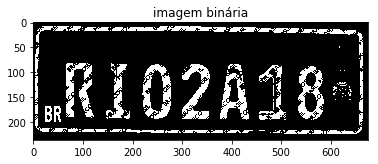

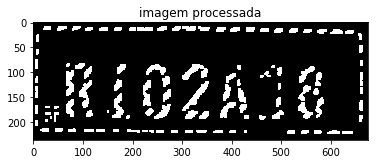

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('placa.png')

qtdeLinhas, qtdeColunas, c = img.shape

B = img[:,:,0]
G = img[:,:,1]
R = img[:,:,2]

imagemBinaria = np.zeros((qtdeLinhas, qtdeColunas)) #criando uma imagem toda branca (todos os pixels com valores = 255)


for i in range(qtdeLinhas):
    for j in range(qtdeColunas):
        if(R[i,j] < 60 and G[i,j] < 60 and B[i,j] < 60): #se eu um pixel cujo canal verde for maior que os outros dois canais (Red e Blue)
            imagemBinaria[i,j] = 255 # o pixel vira fundo
        
plt.gray()
plt.title('imagem binária')
plt.imshow(imagemBinaria)


#vamos efetuar uma operação abertura

elementoEstruturante = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
imagemProcessada = cv2.morphologyEx(imagemBinaria, cv2.MORPH_OPEN, elementoEstruturante)

plt.show()
plt.title('imagem processada')
plt.imshow(imagemProcessada)

True

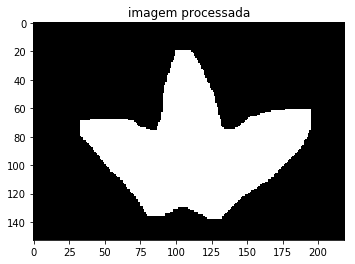

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('img_teste.png')

elementoEstruturante = cv2.getStructuringElement(cv2.MORPH_RECT,(11,11))
imagemProcessada = cv2.morphologyEx(img, cv2.MORPH_OPEN, elementoEstruturante)

plt.show()
plt.title('imagem processada')
plt.imshow(imagemProcessada)

cv2.imwrite('img_teste2.png', imagemProcessada)


Para detectar as bordas do objeto, podemos realizar uma erosao e depois subtrair a imagem original pela imagem erodida

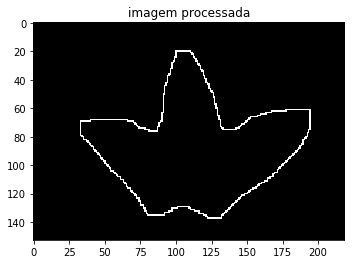

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('img_teste2.png',0)

elementoEstruturante = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))

imagemProcessada = cv2.erode( img, elementoEstruturante, iterations = 1 ) 


imagemProcessada = img-imagemProcessada

plt.show()
plt.title('imagem processada')
plt.imshow(imagemProcessada)

Existe uma função no OpenCV que faz a mesma coisa que o código acima

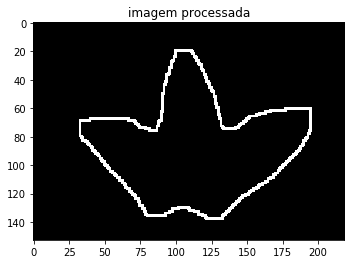

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


imagemOriginal = cv2.imread('img_teste2.png',0)

elementoEstruturante = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))

imagemProcessada = cv2.morphologyEx( imagemOriginal, cv2.MORPH_GRADIENT, elementoEstruturante)


plt.show()
plt.title('imagem processada')
plt.imshow(imagemProcessada)

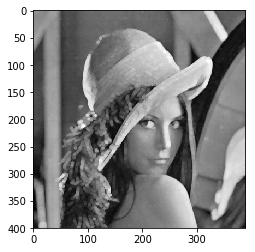

In [21]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

imagemOriginal = cv2.imread("lena.png", 0)

elementoEstruturante = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

#imagemProcessada = cv2.erode( imagemOriginal, elementoEstruturante, iterations = 1) 
imagemProcessada = cv2.dilate(imagemOriginal, elementoEstruturante, iterations = 1)
#imagemProcessada = cv2.morphologyEx(imagemOriginal, cv2.MORPH_TOPHAT, elementoEstruturante)

plt.gray()
plt.imshow(imagemProcessada)




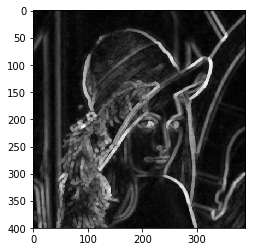

In [22]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

imagemOriginal = cv2.imread("lena.png", 0)

elementoEstruturante = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

imagemProcessada1 = cv2.erode( imagemOriginal, elementoEstruturante, iterations = 2) 
imagemProcessada2 = cv2.dilate(imagemOriginal, elementoEstruturante, iterations = 1)
imagemProcessada = imagemProcessada2-imagemProcessada1

plt.gray()
plt.imshow(imagemProcessada)



Preenchendo o interior de um objetos usando recursividade - CUIDADO, PROCESSO DEMORADO!

o centro do objeto esta na posicao:  84 113


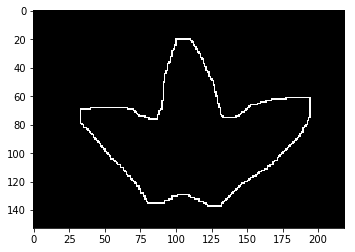

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def preencher(W,i,j):
    qtdeLinhas, qtdeColunas = W.shape
    if(W[i,j] == 255):
        return W
    elif (i == -1 or j == -1 or i > qtdeLinhas or j > qtdeColunas):
        return W
    W[i,j] = 255
    W = preencher(W, i+1, j)
    W = preencher(W, i, j+1)
    W = preencher(W, i-1, j)
    W = preencher(W, i, j-1)
    return W
    
    
    
img = cv2.imread('img_teste3.png',0)

qtdeLinhas, qtdeColunas = img.shape


cx = 0
cy = 0
cont = 0

for i in range(qtdeLinhas):
    for j in range(qtdeColunas):
        if(img[i,j] == 255):
            cont = cont + 1
            cx = cx+i
            cy = cy+j

x = round(cx/cont)
y = round(cy/cont)

print('o centro do objeto esta na posicao: ', x,y)

#img[x,y] = 255
#img = preencher(img, x, y)

plt.gray()
plt.imshow(img)

#exercício: separar os feijões. Colocar uma cor para cada um